In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Generation des donnees
np.random.seed(1)
n = 50
X_train = np.random.rand(n,1)
beta_0 = 7
Y_train = X_train*beta_0 + 0.5*np.random.randn(n,1)

In [3]:
X_train.shape

(50, 1)

In [4]:
Y_train.shape

(50, 1)

In [5]:
#MCO LINEAR REGRESSION

In [6]:
from sklearn.linear_model import LinearRegression

reg_OLS = LinearRegression()
reg_OLS.fit(X_train,Y_train)

LinearRegression()

In [7]:
def score(x):
    R = abs(Y_train-reg_OLS.predict(X_train))
    F=0
    for i in range(len(R)):
        F+= R[i]<= x
    return F/len(R)

def quantile(p):
    x=np.linspace(0,2,1000)
    l=[]
    for i in x:
        if score(i) >= p:
            l.append(i)
    return np.min(l)

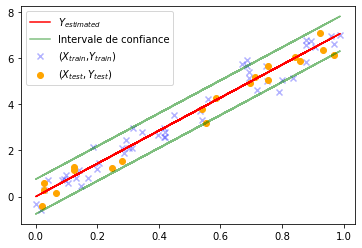

<Figure size 864x576 with 0 Axes>

In [8]:
plt.scatter(X_train,Y_train,marker='x',color='b',alpha=.3, label='($X_{train}$,$Y_{train}$)')
plt.plot(X_train,reg_OLS.predict(X_train),color='red', label='$Y_{estimated}$')

#Construction de l'Intervalle de confiance
low = reg_OLS.predict(X_train) - quantile(0.90)
high = reg_OLS.predict(X_train) + quantile(0.90)

plt.plot(X_train,low, color='green',alpha=.5, label='Intervale de confiance')
plt.plot(X_train,high, color='green',alpha=.5)

#Observations de nos (X_test,Y_test)

n_test=20
X_test = np.random.rand(n_test,1)
Y_test = X_test*beta_0+0.5*np.random.randn(n_test,1)

plt.scatter(X_test,Y_test,color='orange',label='($X_{test},Y_{test}$)')


plt.legend()
plt.figure(figsize=(12,8))
plt.show()

In [2]:
# kNN k-nearest neighbours (k= 5 ou 9)